Using TensorFlow backend.


(50000, 28, 28) (50000,)


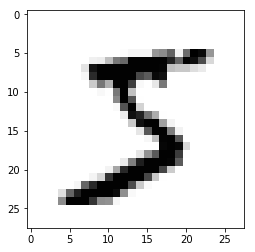

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
import tensorflow as tf
import numpy as np

### Helper functions

In [3]:
def to_1hot(y, num_classes):
    """ Converts y labels to sparse matrix, see:
    https://stackoverflow.com/questions/29831489/numpy-1-hot-array
    """
    y_1hot = np.zeros((y.shape[0], num_classes))
    y_1hot[np.arange(y.shape[0]), y] = 1
    return y_1hot

def flatten_images(x):
    """ Converts input into 2d array """
    return x.reshape(x.shape[0], -1)

### Preparing data

In [4]:
X_train_prep = flatten_images(X_train)
X_test_prep = flatten_images(X_test)
num_classes = np.unique(y_train).shape[0]
y_train_1hot = to_1hot(y_train, num_classes)
y_test_1hot = to_1hot(y_test, num_classes)

### Creating network

In [5]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 784])
y = tf.placeholder(dtype=tf.float32, shape=[None, 10])

In [6]:
input_shape = X_train_prep.shape[1]
hidden_1 = 256
out_shape = num_classes

In [7]:
W1 = tf.Variable(initial_value=tf.random_normal(shape=(input_shape, hidden_1)))
b1 = tf.Variable(initial_value=tf.zeros(hidden_1))
W2 = tf.Variable(initial_value=tf.random_normal(shape=(hidden_1, out_shape)))
b2 = tf.Variable(initial_value=tf.zeros(out_shape))

In [8]:
z1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
y_hat = tf.nn.softmax(tf.matmul(z1, W2) + b2)

In [9]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_hat), reduction_indices=[1]))

In [10]:
optimizer = tf.train.AdamOptimizer(.01).minimize(cross_entropy)

In [11]:
correct_prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Training

In [12]:
num_epochs = 20
batch_size = 100
train_loop = X_train.shape[0] // batch_size

In [13]:
train_loss = []
test_loss = []
train_acc = []
test_acc = []
np.random.seed(42)
with tf.Session() as s:
    tf.global_variables_initializer().run()
    for epoch in range(num_epochs):
        idx = np.arange(X_train_prep.shape[0])
        # randomly shuffling all samples
        np.random.shuffle(idx)
        for batch in range(train_loop):
            s_idx = batch * batch_size
            e_idx = (batch + 1) * batch_size
            batch_idx = idx[s_idx:e_idx]
            s.run(optimizer, feed_dict={x: X_train_prep[batch_idx], y: y_train_1hot[batch_idx]})
        # evaluating on every epoch
        train_loss.append(s.run(cross_entropy, feed_dict={x: X_train_prep, y: y_train_1hot}))
        test_loss.append(s.run(cross_entropy, feed_dict={x: X_test_prep, y: y_test_1hot}))
        train_acc.append(s.run(accuracy, feed_dict={x: X_train_prep, y: y_train_1hot}))
        test_acc.append(s.run(accuracy, feed_dict={x: X_test_prep, y: y_test_1hot}))
        print('epoch %2d test accuracy: %.4f' % ((epoch + 1), test_acc[-1]))

epoch  1 test accuracy: 0.9215
epoch  2 test accuracy: 0.9380
epoch  3 test accuracy: 0.9483
epoch  4 test accuracy: 0.9574
epoch  5 test accuracy: 0.9580
epoch  6 test accuracy: 0.9526
epoch  7 test accuracy: 0.9616
epoch  8 test accuracy: 0.9546
epoch  9 test accuracy: 0.9617
epoch 10 test accuracy: 0.9676
epoch 11 test accuracy: 0.9629
epoch 12 test accuracy: 0.9625
epoch 13 test accuracy: 0.9618
epoch 14 test accuracy: 0.9683
epoch 15 test accuracy: 0.9596
epoch 16 test accuracy: 0.9683
epoch 17 test accuracy: 0.9697
epoch 18 test accuracy: 0.9691
epoch 19 test accuracy: 0.9629
epoch 20 test accuracy: 0.9641


### Results

In [14]:
print('max test accuracy: %.4f on the epoch: %2d' % (max(test_acc), np.argmax(test_acc)))

max test accuracy: 0.9697 on the epoch: 16


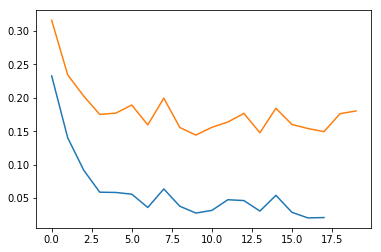

In [15]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.show()

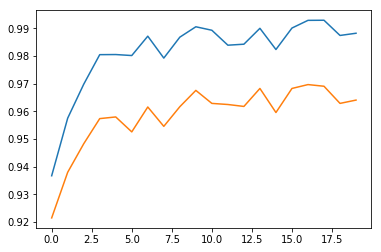

In [16]:
plt.plot(train_acc)
plt.plot(test_acc)
plt.show()